## Run tests on larger dataset

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# for Colab only
!curl -s https://course.fast.ai/setup/colab | bash


# echo Updating fastai...
# pip install fastai --upgrade > /dev/null
# echo Done.

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'Colab Notebooks/'  
# ! ls

Updating fastai...
Done.


In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# data_dir = "/content/gdrive/My Drive/Colab Notebooks/Tection/data"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [0]:
! rm -r data
! mkdir data

### Load the Training Images

In [36]:
%%bash
# see what this one is 

switch=true
if $switch; then
    export fileid=1--zf9tczZtnqVyYH2c2KvtSuf84fV6Li
    export filename=FEC-data-0820.zip

    ## CURL ##
    curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
    curl -L -b cookies.txt -o $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
    rm -f confirm.txt cookies.txt
    
    unzip -u -q $filename -d data
    
    mv data/data/crop data/crop
    mv data/data/images data/images
    mv data/data/labels data/labels
    rm -r data/data
    
fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3248    0  3248    0     0  12687      0 --:--:-- --:--:-- --:--:-- 12687
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   3495      0 --:--:-- --:--:-- --:--:--  3464
100  579M    0  579M    0     0  90.8M      0 --:--:--  0:00:06 --:--:--  114M


In [4]:
print(len(get_image_files('data/images')))
print(len(get_image_files('data/crop/images-400')))


887
12849


### Misc load sets

In [0]:
# %%bash
# # load the subset of Large FEC Set zip file

# switch=true
# if $switch; then
#     export fileid=1e_zWxuD6MZWm--DyFDGGL_BUKx-Wd_pp
#     export filename=FEC-large-subset.zip

#     ## CURL ##
#     curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
#          | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
#     curl -L -b cookies.txt -o $filename \
#          'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
#     rm -f confirm.txt cookies.txt
    
#     unzip -u -q $filename -d data
    
#     mv data/subset data/images
    
# fi

In [0]:
# %%bash
# # load the Large -FEC Set zip file

# switch=true
# if $switch; then
#     export fileid=1LB-Rz2CiINl0Gytod7jBwTZNkmkaB7GI
#     export filename=FEC-large.zip

#     ## CURL ##
#     curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
#          | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
#     curl -L -b cookies.txt -o $filename \
#          'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
#     rm -f confirm.txt cookies.txt
    
#     unzip -u -q $filename -d data
    
#     mv data/positive data/images
    
# fi

# # https://drive.google.com/file/d/14MUsf7aaKfv8jCZYl3dhsKQ4cXBMRGT1/view?usp=sharing
# # https://drive.google.com/file/d/12_EuG7NeYzXaMd0sRlqa9WWcqqgTbvWv/view?usp=sharing
# # https://drive.google.com/file/d/1EMJQ0DRP9TUf4LoLev-8ouV2ecYVlQeC/view?usp=sharing
# # https://drive.google.com/file/d/1iDHyVkEUNp3yzmk4dUk3uM5wNp70N-FH/view?usp=sharing
# # https://drive.google.com/file/d/1e_zWxuD6MZWm--DyFDGGL_BUKx-Wd_pp/view?usp=sharing
# # https://drive.google.com/file/d/1LB-Rz2CiINl0Gytod7jBwTZNkmkaB7GI/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3255    0  3255    0     0  23759      0 --:--:-- --:--:-- --:--:-- 23759
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1197      0 --:--:-- --:--:-- --:--:--  1193
100  565M    0  565M    0     0   147M      0 --:--:--  0:00:03 --:--:--  199M


### Load The Test Images

In [0]:
%%bash
# load the Large FEC Set Test Images zip file

switch=true
if $switch; then
    export fileid=1_Mq9U8Kq3leWKsWP60JQeROtfX6-Gf01
    export filename=FEC-large-testimages.zip

    ## CURL ##
    curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
    curl -L -b cookies.txt -o $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
    rm -f confirm.txt cookies.txt
    
    unzip -u -q $filename -d data
    
fi

# https://drive.google.com/file/d/14MUsf7aaKfv8jCZYl3dhsKQ4cXBMRGT1/view?usp=sharing
# https://drive.google.com/file/d/12_EuG7NeYzXaMd0sRlqa9WWcqqgTbvWv/view?usp=sharing
# https://drive.google.com/file/d/1EMJQ0DRP9TUf4LoLev-8ouV2ecYVlQeC/view?usp=sharing
# https://drive.google.com/file/d/1iDHyVkEUNp3yzmk4dUk3uM5wNp70N-FH/view?usp=sharing
# https://drive.google.com/file/d/1_Mq9U8Kq3leWKsWP60JQeROtfX6-Gf01/view?usp=sharing
# https://drive.google.com/file/d/12_EuG7NeYzXaMd0sRlqa9WWcqqgTbvWv/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3249    0  3249    0     0  17374      0 --:--:-- --:--:-- --:--:-- 17374
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2535      0 --:--:-- --:--:-- --:--:--  2519
100 34.0M    0 34.0M    0     0  11.9M      0 --:--:--  0:00:02 --:--:-- 16.4M


# Data creation Section

### Create labels





In [0]:
## Write png files with circle annotations
from PIL import Image, ImageDraw
def proc_circles(fn, plot=False, radius=20):
    data = json.load(open(load_json_fn(fn)))
    img = PIL.Image.open(load_img_fn(fn))
    num_Str = 0
    num_Nem = 0
    for s, sh in enumerate(data['shapes']):
        if sh["shape_type"] == "rectangle":
          if sh["label"][:3] == "Str":
              fill = (255,0,0,64)
              num_Str +=1
          elif sh["label"][:3] == "Nem":
              fill = (0,255,0,64)
              num_Nem +=1
          else:
              print('[Error]: unknown label')
          
          # draw a circle at the rectangle
          xy = np.asarray(sh["points"])
          ave = np.mean(xy,axis=0)
          draw = PIL.ImageDraw.Draw(img)
          cx = ave[0]
          cy = ave[1]
          draw.ellipse([cx - radius, cy - radius, cx + radius, cy + radius], outline=0, fill=fill)


    img = np.asarray(img)
    if plot:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(img)
        ax.set_axis_off()
        plt.tight_layout()
# switch=true
# if $switch; then
        plt.show()
    
    return img, num_Str, num_Nem

def label_colormap(N=256):

    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    cmap = np.zeros((N, 3))
    for i in range(0, N):
        id = i
        r, g, b = 0, 0, 0
        for j in range(0, 8):
            r = np.bitwise_or(r, (bitget(id, 0) << 7 - j))
            g = np.bitwise_or(g, (bitget(id, 1) << 7 - j))
            b = np.bitwise_or(b, (bitget(id, 2) << 7 - j))
            id = (id >> 3)
        cmap[i, 0] = r
        cmap[i, 1] = g
        cmap[i, 2] = b
    cmap = cmap.astype(np.float32) / 255
    return cmap

# path = Path('data/output/positive/')
img_path = Path('data/images/')
lab_path = Path('data/labels/')

lab_path.mkdir(parents=True, exist_ok=True)

load_json_fn  = lambda x: f'{img_path}/{x.stem}.json'
load_img_fn   = lambda x: f'{img_path}/{x.stem}.jpg'
save_lbl_fn   = lambda x: f'{lab_path}/{x.stem}.png'
# switch=true
# if $switch; then lambda x: f'{lab_path}/{x.stem}.png'


fnames = sorted(get_image_files(img_path))

# fnames = fnames[:10]
print ("Number of file to process", len(fnames))

colormap = label_colormap(255)
tot_num_Str, tot_num_Nem = 0,0
for fn in fnames:    
    img, num_Str, num_Nem = proc_circles(fn, plot=False, radius=20)
    lbl_pil_1 = (img[:, :, 0] >= 200) & (img[:, :, 1] <= 10) & (img[:, :, 2] <= 10)    
    lbl_pil_2 = (img[:, :, 1] >= 200) & (img[:, :, 0] <= 10) & (img[:, :, 2] <= 10) 
    lbl_pil = lbl_pil_1 + 2 * lbl_pil_2
#     show_img(lbl_pil, figsize=(10, 10))
    
    lbl_pil = PIL.Image.fromarray(lbl_pil.astype(np.uint8), mode='P')
    lbl_pil.putpalette((colormap*255).astype(np.uint8).flatten())
    lbl_pil.save(save_lbl_fn(fn))    
    tot_num_Str += num_Str
    tot_num_Nem += num_Nem
    print( load_img_fn(fn), load_json_fn(fn),  'Number Strongyle & Nematodirus found', num_Str, num_Nem)
    
    
print(f'Total number of Strongyle = {tot_num_Str}, Total number of Nematodirus = {tot_num_Nem}')    

In [0]:
print(len(get_image_files('data/labels')))

887


### Not used : Resize images to half res

In [0]:
# ! rm -r data/FEC-data-half/positive

In [0]:
##  Convert GIF to PNG
def resize_one(fn, i, src_path, dest_path):
    # open_image(src_path/fn.name).resize(1232).save(dest_path/f'{fn.name}')
    PIL.Image.open(src_path/fn.name).resize((1232,1232)).save(dest_path/f'{fn.name}')
    
def resize_dir(src_path, dest_path, number=10): 
  fnames = sorted(get_image_files(src_path))
#   fnames = fnames[:number]
  print(len(fnames), ' files to resize')
#   if not dest_path.exists():
  dest_path.mkdir(parents=True, exist_ok=True)
  print(f"converting {src_path} into {dest_path}")

  parallel(partial(resize_one, src_path=src_path, dest_path=dest_path), fnames)
#   else:
#     print(f"Note: No resize as {dest_path} already exists")

In [0]:

resize_dir(Path('data/FEC-full/positive'), Path('data/FEC-half/positive'))

In [0]:
resize_dir(Path('data/FEC-full/labels'), Path('data/FEC-half/labels'))

In [0]:
resize_dir(Path('data/FEC-full/negative'), Path('data/FEC-half/negative'))

In [0]:
resize_dir(Path('data/FEC-full/testimages'), Path('data/FEC-half/testimages'))

FEC-half
FEC-full
FEC-crop-full
FEC-crop-half

In [0]:
! mv data/FEC-crop-half data/FEC-half-crop

In [0]:
open_image('data/FEC-data-half/labels/220966 - 1.png').shape

torch.Size([3, 1232, 1232])

In [0]:
def resize_json(fn, div=2):
    data = json.load(open(fn))
    _size = [data['imageWidth'], data['imageHeight']]
    for s, sh in enumerate(data['shapes']):
        for p, pnt in enumerate(sh["points"]):
            data['shapes'][s]['points'][p][0] = round(data['shapes'][s]['points'][p][0]//div)
            data['shapes'][s]['points'][p][1] = round(data['shapes'][s]['points'][p][1]//div)
    data['imageData']= None
    data['imageWidth']  = data['imageWidth']//div
    data['imageHeight'] = data['imageHeight']//div  
    return data
  
load_json_fn = lambda x: f'data/FEC-full/positive/{x.stem}.json'
load_img_fn  = lambda x: f'data/FEC-full/positive/{x.stem}.jpg'

save_json_fn = lambda x: f'data/FEC-half/positive/{x.stem}.json'

path = Path('data/FEC-full/positive')
fnames = sorted(get_image_files(path))
# fnames = fnames[:5]

for fn in fnames:    

    data= resize_json(load_json_fn(fn))
    with open(save_json_fn(fn), 'w') as outfile:
        json.dump(data, outfile, ensure_ascii=False, indent=4)   

In [0]:
def label_colormap(N=256):

    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    cmap = np.zeros((N, 3))
    for i in range(0, N):
        id = i
        r, g, b = 0, 0, 0
        for j in range(0, 8):
            r = np.bitwise_or(r, (bitget(id, 0) << 7 - j))
            g = np.bitwise_or(g, (bitget(id, 1) << 7 - j))
            b = np.bitwise_or(b, (bitget(id, 2) << 7 - j))
            id = (id >> 3)
        cmap[i, 0] = r
        cmap[i, 1] = g
        cmap[i, 2] = b
    cmap = cmap.astype(np.float32) / 255
    return cmap
  
colormap = label_colormap(255)

### Crop images by egg centers


In [0]:
! rm -r data/crop

In [0]:
##crop images around json centers
import matplotlib.patches as mpatches

# colormap = label_colormap(255)

def crop_image(fn, plot=False, size=200):
  #   print(fn)
  img_lab = np.asarray(PIL.Image.open(load_lab_fn(fn)))
  img_raw = np.asarray(PIL.Image.open(load_img_fn(fn)))

  
  data = json.load(open(load_json_fn(fn)))

  imgShape = img_lab.shape
  
  if plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img_lab)
  
  n=0
  for n, sh in enumerate(data['shapes']):
    if sh["shape_type"] == "rectangle":
      xy = np.asarray(sh["points"])
      ave = np.mean(xy,axis=0)

      cx = int(round(ave[1]))
      cy = int(round(ave[0]))
      cx = min(cx, imgShape[0]-size//2) 
      cx = max(cx, size//2) 
      cy = min(cy, imgShape[1]-size//2) 
      cy = max(cy, size//2) 

      minr = cx-size//2; minc = cy-size//2 
      maxr = cx+size//2; maxc = cy+size//2 
      if plot:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

      crop = img_lab[minr:maxr, minc:maxc]    
      PIL.Image.fromarray(crop.astype(np.uint8)).save(save_lab_fn(fn,n))

      crop = img_raw[minr:maxr, minc:maxc]
      PIL.Image.fromarray(crop.astype(np.uint8)).save(save_img_fn(fn,n), quality=90)

    
  print (f'Saved {n} files in {crop_img_path}-{size}')
 
  if plot:
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

if True:
  CROP_SIZE = 200
#   CROP_SIZE = 300
  img_path = Path('data/images/')
  lab_path = Path('data/labels/')

  crop_img_path = Path('data/crop/images/')
  crop_lab_path = Path('data/crop/labels/')


  load_json_fn = lambda x: f'{img_path}/{x.stem}.json'

  load_img_fn  = lambda x: f'{img_path}/{x.stem}.jpg'
  load_lab_fn  = lambda x: f'{lab_path}/{x.stem}.png'

  save_img_fn = lambda x, n: f'{crop_img_path}-{CROP_SIZE}/{x.stem}-{n}.jpg'
  save_lab_fn = lambda x, n: f'{crop_lab_path}-{CROP_SIZE}/{x.stem}-{n}.png'

  Path(f'{crop_img_path}-{CROP_SIZE}').mkdir(parents=True, exist_ok=True)
  Path(f'{crop_lab_path}-{CROP_SIZE}').mkdir(parents=True, exist_ok=True)


  fnames = sorted(get_image_files(img_path))
  fnames = fnames[:100]
  print(f"Cropping {len(fnames)} images" )
  for fn in fnames:
    crop_image(fn, size=CROP_SIZE)

  

In [6]:
print(len(get_image_files(f'{crop_img_path}-{CROP_SIZE}')))
print(len(get_image_files(f'{crop_lab_path}-{CROP_SIZE}')))

1387
1387


In [0]:
%%bash
zip -r 'FEC_data.zip' data

In [0]:
! mv FEC_data.zip '/content/gdrive/My Drive/Colab Notebooks/Techion/data/SecondDataSet'

### Crop Images into tiles

In [0]:
PLOT = False
def padImage_np(img, padding=100):
  if padding and padding > 0:
    if img.ndim == 3:
      return np.stack([np.pad(img[:,:,c], padding, mode='constant', constant_values=0) for c in range(3)], axis=2)
    elif img.ndim == 2:
      return np.pad(img[:,:], padding, mode='constant', constant_values=0)
    else:
      print("Error:, img.ndim !=  2 or 3")
      
  else:
    return img
  
def cut_tiles_np(img, TM=4, TN=4, pad=100):
  M, N = (img.shape[0]-pad*2)//TM, (img.shape[1]-pad*2)//TN 
  OM, ON = pad + M//2, pad + N//2
  if img.ndim == 3:
    return [img[x-OM:x+OM,y-ON:y+ON,:] for x in range(pad+M//2,img.shape[0],M) for y in range(pad+N//2,img.shape[1],N)]
  else:
    return [img[x-OM:x+OM,y-ON:y+ON]   for x in range(pad+M//2,img.shape[0],M) for y in range(pad+N//2,img.shape[1],N)]
    

def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax
  
def tile_image(fn, plot=False):
    #   print(fn)
    img_lab = padImage_np(np.asarray(PIL.Image.open(load_lab_fn(fn))))
    img_raw = padImage_np(np.asarray(PIL.Image.open(load_img_fn(fn))))
    tiles_lab = cut_tiles_np(img_lab)
    tiles_img = cut_tiles_np(img_raw)
    
    if plot:
        fig, axes = plt.subplots(figsize=(10, 6))
    
    count=0
    for n, tile in enumerate(tiles_lab):
        if tile.max() > 0:
            PIL.Image.fromarray(tiles_lab[n].astype(np.uint8)).save(save_lab_fn(fn,count))
            PIL.Image.fromarray(tiles_img[n].astype(np.uint8)).save(save_img_fn(fn,count), quality=90)
            count+=1
    
        
    print (f'Saved {count} files in {crop_img_path/fn.name}')
    
    if PLOT:
        # ax.set_axis_off()
        plt.tight_layout()
        plt.show()
      
  
if True:
    CROP_SIZE = 400
    img_path = Path('data/subset/')
    lab_path = Path('data/labels/')
    
    crop_img_path = Path('data/crop/images/')
    crop_lab_path = Path('data/crop/labels/')
    
    
    load_json_fn = lambda x: f'{img_path}/{x.stem}.json'
    
    load_img_fn  = lambda x: f'{img_path}/{x.stem}.jpg'
    load_lab_fn  = lambda x: f'{lab_path}/{x.stem}.png'
    
    save_img_fn = lambda x, n: f'{crop_img_path}-{CROP_SIZE}/{x.stem}-{n}.jpg'
    save_lab_fn = lambda x, n: f'{crop_lab_path}-{CROP_SIZE}/{x.stem}-{n}.png'
    
    Path(f'{crop_img_path}-{CROP_SIZE}').mkdir(parents=True, exist_ok=True)
    Path(f'{crop_lab_path}-{CROP_SIZE}').mkdir(parents=True, exist_ok=True)
    
    
    fnames = sorted(get_image_files(img_path))
    fnames = fnames[:100]
    for fn in fnames:
        tile_image(fn)  


    
# img = to_np(open_image('data/subset/220972 - 1.jpg').resize(800).px).transpose(1,2,0)
# img = padImage_np(img)
# tiles = cut_tiles_np(img)

# vstack = lay_tiles_np(tiles, TM=4, TN=4, pad=100)
# show_img(vstack, figsize = (10,10))

In [0]:
# ! rm -r data/crop

In [0]:
print(len(get_image_files(f'{crop_img_path}-{CROP_SIZE}')))
print(len(get_image_files(f'{crop_lab_path}-{CROP_SIZE}')))

In [0]:
%%bash
cd data
zip -r 'FEC-large-subset+json+crop.zip' crop/images-400 crop/labels-400
# ! mv data/FEC-large-subset+json+crop.zip '/content/gdrive/My Drive/Colab Notebooks/Techion/data'


# Download Cropped Images

In [0]:
CROP_SIZE = 400

img_path = Path('data/images/')
lab_path = Path('data/labels/')

crop_img_path = Path('data/crop/images/')
crop_lab_path = Path('data/crop/labels/')

print(len(get_image_files(f'{crop_img_path}-{CROP_SIZE}')))
print(len(get_image_files(f'{crop_lab_path}-{CROP_SIZE}')))

1387
1387


In [0]:
%%bash
# load the Large FEC Set Test Images zip file

switch=true
if $switch; then
    export fileid=1uQw5KPLuTzpKRoN-vbI346Ck4TcSCiOe
    export filename=FEC-large-subset+json+crop.zip

    ## CURL ##
    curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
    curl -L -b cookies.txt -o $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
    rm -f confirm.txt cookies.txt
    
    unzip -u -q $filename -d data
    
fi

# https://drive.google.com/file/d/14MUsf7aaKfv8jCZYl3dhsKQ4cXBMRGT1/view?usp=sharing
# https://drive.google.com/file/d/12_EuG7NeYzXaMd0sRlqa9WWcqqgTbvWv/view?usp=sharing
# https://drive.google.com/file/d/1EMJQ0DRP9TUf4LoLev-8ouV2ecYVlQeC/view?usp=sharing
# https://drive.google.com/file/d/1iDHyVkEUNp3yzmk4dUk3uM5wNp70N-FH/view?usp=sharing
# https://drive.google.com/file/d/1_Mq9U8Kq3leWKsWP60JQeROtfX6-Gf01/view?usp=sharing
# https://drive.google.com/file/d/12_EuG7NeYzXaMd0sRlqa9WWcqqgTbvWv/view?usp=sharing
# https://drive.google.com/file/d/1uQw5KPLuTzpKRoN-vbI346Ck4TcSCiOe/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    161      0 --:--:--  0:00:02 --:--:--   161
100 17.6M    0 17.6M    0     0  3876k      0 --:--:--  0:00:04 --:--:-- 13.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    233      0 --:--:--  0:00:01 --:--:--   233
100 17.6M    0 17.6M    0     0  9330k      0 --:--:--  0:00:01 --:--:-- 9330k


# Take first 1500 to 3000 of crop  for training

In [3]:
fnames = sorted(get_image_files('data/crop/images-400'))
fnames = fnames[3000:]
number = len(fnames)
number

import os
for fn in fnames:
    os.remove(fn)

fnames = sorted(get_image_files('data/crop/images-400'))
len(fnames)    

3000

In [38]:
fnames = sorted(get_image_files('data/crop/labels-400'))
len(fnames)    

12849

# Create DataBunch

In [0]:
# create data set
CROP_SIZE=400
codes = np.array(['background', 'egg1', 'egg2']);codes
# path_lbl = Path('data/FEC-half-crop/Lab-400/')
# path_img = Path('data/FEC-half-crop/Raw-400/')
path_lbl = Path(f'data/crop/labels-{CROP_SIZE}/')
path_img = Path(f'data/crop/images-{CROP_SIZE}/')

bs = 20

get_label_fn = lambda x: path_lbl/f'{x.stem}.png'

#12000 images
# nfiles = len(get_image_files(path_img))
# perc_use = 50/nfiles

# print(f'Number training & validation files {perc_use*nfiles}')
src = (SegmentationItemList.from_folder(path_img)
#        .use_partial_data(perc_use, seed=42)
       .split_by_rand_pct(valid_pct=0.2, seed=42)
       .label_from_func(get_label_fn, classes=codes, convert_mode='RGB'))

data = (src.transform(get_transforms(flip_vert=True), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [13]:
path_lbl

PosixPath('data/crop/labels-400')

### Show example images


In [0]:
x,y = data.one_batch()

In [11]:
x.shape, y.shape

(torch.Size([25, 3, 200, 200]), torch.Size([25, 1, 200, 200]))

In [12]:
for i in range(20):
    print(i, y[i].max(), torch.histc(y[i].float(), bins=4, min=0, max=3))


0 tensor(1) tensor([34103.,  5897.,     0.,     0.])
1 tensor(1) tensor([38733.,  1267.,     0.,     0.])
2 tensor(1) tensor([38620.,  1380.,     0.,     0.])
3 tensor(1) tensor([38919.,  1081.,     0.,     0.])
4 tensor(1) tensor([38643.,  1357.,     0.,     0.])
5 tensor(1) tensor([38024.,  1976.,     0.,     0.])
6 tensor(1) tensor([38369.,  1631.,     0.,     0.])
7 tensor(1) tensor([37174.,  2826.,     0.,     0.])
8 tensor(1) tensor([38820.,  1180.,     0.,     0.])
9 tensor(1) tensor([37388.,  2612.,     0.,     0.])
10 tensor(1) tensor([37621.,  2379.,     0.,     0.])
11 tensor(1) tensor([38936.,  1064.,     0.,     0.])
12 tensor(1) tensor([35149.,  4851.,     0.,     0.])
13 tensor(1) tensor([37776.,  2224.,     0.,     0.])
14 tensor(1) tensor([37470.,  2530.,     0.,     0.])
15 tensor(2) tensor([38894.,     0.,  1106.,     0.])
16 tensor(1) tensor([35832.,  4168.,     0.,     0.])
17 tensor(1) tensor([38553.,  1447.,     0.,     0.])
18 tensor(2) tensor([36013.,  2239.,  

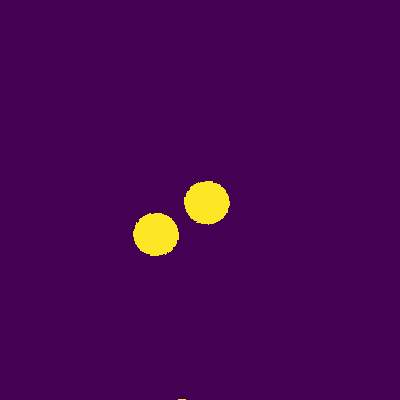

In [0]:
Image(y[2])

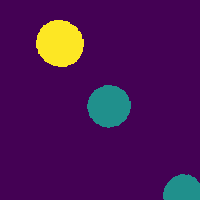

In [14]:
Image(y[18])

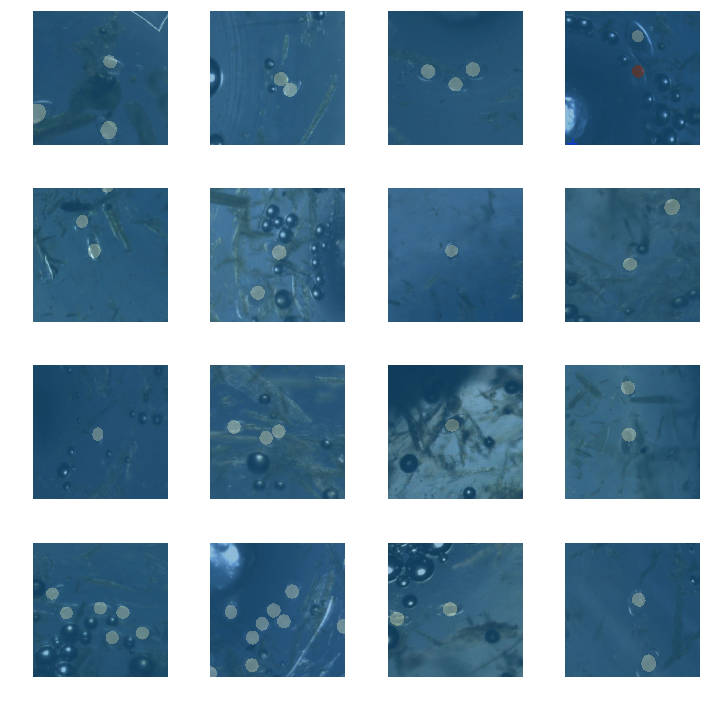

In [40]:
data.show_batch(4, figsize=(10,10))

In [0]:
x,y = next(iter(data.train_dl))
x = data.denorm(x)
print(x.shape,x.min(), x.max())
print(y.shape,y.min(), y.max())

show_image(x[0])
show_image(y[0])

# Training

In [0]:
# import pdb
# pdb.set_trace()
def acc_metric1(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

def acc_metric2(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)[target>0]==target[target>0]).float().mean()
  
metrics=acc_metric2
# metrics=acc_metric1

wd=1e-2
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd, bottle=False).to_fp16()
# weights = [0.1, 0.45, 0.45]
# class_weights=torch.FloatTensor(weights).cuda()
# learn.crit = nn.CrossEntropyLoss(weight=class_weights)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


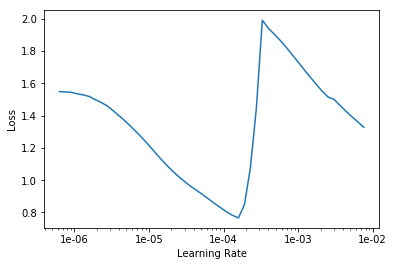

In [42]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 3e-3
def do_fit(save_name, lrs=slice(lr), pct_start=0.9):
    learn.fit_one_cycle(10, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=1, imgsize=5)

In [6]:
lr = 3e-5
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,acc_metric2,time
0,0.172519,0.091612,0.189260,13:50
1,0.088381,0.071321,0.410147,12:31
2,0.070407,0.059830,0.473714,12:31
3,0.065795,0.057163,0.394902,12:31
4,0.064390,0.056197,0.459449,12:31


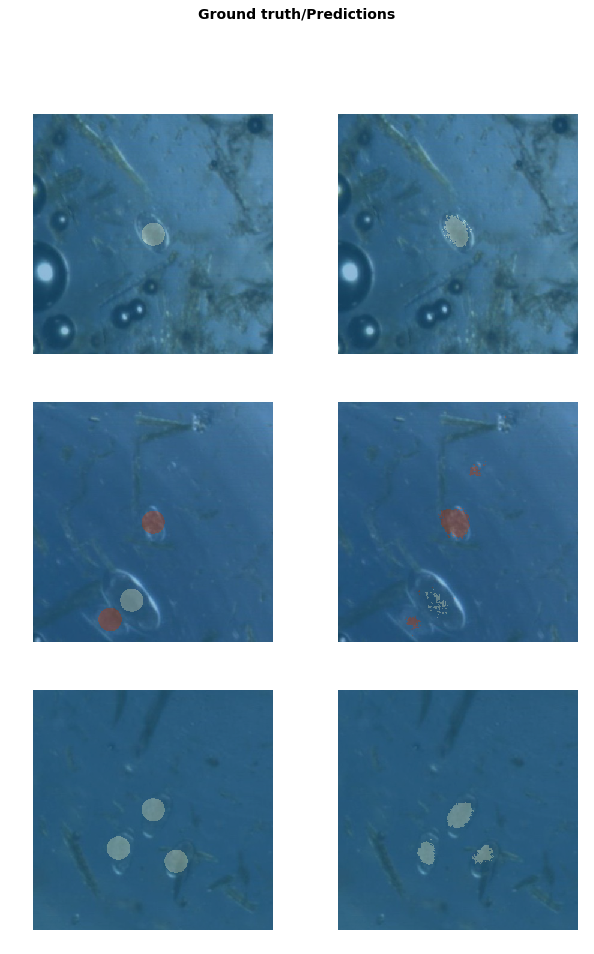

In [9]:
learn.show_results(rows=3, imgsize=5)

In [0]:

learn.save('stage1')

In [0]:
os.rename(learn.data.path/'models/stage1.pth', 'stage1.pth')
! cp 'stage1.pth' 'gdrive/My Drive/Colab Notebooks/Techion/data/models'

In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(5, slice(lr/10))

epoch,train_loss,valid_loss,acc_metric2,time
0,0.063324,0.056060,0.417636,12:55


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored

In [0]:
defaults.device = torch.device('cpu')
learn.export('export.pkl')
os.rename(learn.data.path/'export.pkl', 'export.pkl')
! cp 'export.pkl' 'gdrive/My Drive/Colab Notebooks/Techion/data/pickels'

In [0]:
learn.save('stage2')

In [0]:
learn.load('stage2')

In [0]:
os.rename(learn.data.path/'models/stage2.pth', 'stage2.pth')
! cp 'stage2.pth' 'gdrive/My Drive/Colab Notebooks/Techion/data/models'

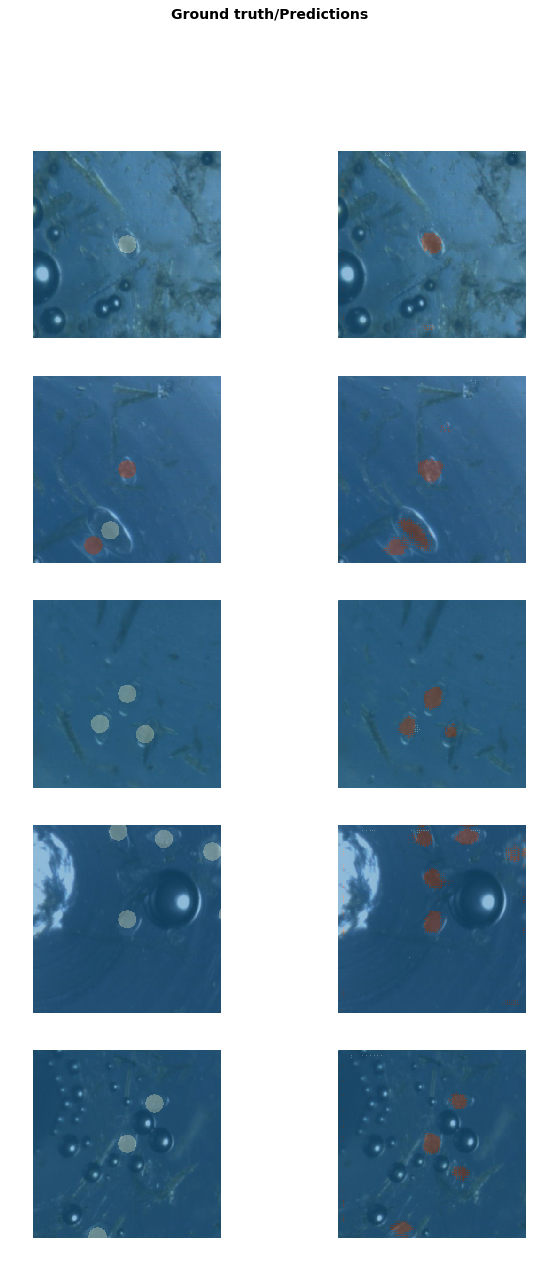

In [0]:
learn.show_results(rows=5, figsize=(10,20), ds_type=DatasetType.Valid)

# Inference section

## Load Exported model

In [0]:
%%bash

switch=true
if $switch; then
    export fileid=1eSirH4JdtfnbfDTkc7piNBL2cHQ8YZDz     
    export fileid=17hI_t_K96bXT3UNMez5kaIyBX8918yxJ

    export filename=export.pkl
    
#     export fileid=1MV-J9SbuLg5FOcET_dmvmnwNMWUcKv2v
#     export filename=export-800-fp16.pkl
    
#     export fileid=1eX1Ur4z3mc2k8C_5GhYXiZzBqUBrrSEd
#     export filename=export-small-dataset-res34-crop224.pkl


    ## CURL ##
    curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt
    curl -L -b cookies.txt -o $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)
    rm -f confirm.txt cookies.txt
fi

# https://drive.google.com/file/d/1-3Bp731dgs5ZHtNp6VWbHJpl6SSrvD_J/view?usp=sharing
# https://drive.google.com/file/d/1-1qBE1LS7_fseyBmUfOMDiaUd32UkgkC/view?usp=sharing
# https://drive.google.com/file/d/17hI_t_K96bXT3UNMez5kaIyBX8918yxJ/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0     52      0 --:--:--  0:00:07 --:--:--    91
100 85.8M    0 85.8M    0     0   9.8M      0 --:--:--  0:00:08 --:--:--  229M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    123      0 --:--:--  0:00:03 --:--:--   123
100 85.8M    0 85.8M    0     0  24.7M      0 --:--:--  0:00:03 --:--:--  475M


In [0]:
# defaults.device = 'cpu'
defaults.device = 'cuda'

def acc_metric(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()
  
learn = load_learner('', 'export.pkl')

learn.model.float()

## Infer Classes

In [0]:
from fastai import *
from fastai.vision import *
#   import pdb; pdb.set_trace() 

def padImage_t(img, pad=100):
  if pad and pad > 0:
    return F.pad(input=img.px, pad=(pad, pad, pad, pad), mode='constant', value=0)
  else:
    return img

def cut_tiles_t(img, TM=4, TN=4, pad=100):
  M, N = (img.shape[1]-pad*2)//TM, (img.shape[2]-pad*2)//TN 
  OM, ON = pad + M//2, pad + N//2   
  return [Image(img[:,x-OM:x+OM,y-ON:y+ON]) for x in range(pad+M//2,img.shape[1],M) for y in range(pad+N//2,img.shape[2],N)]

def lay_tiles_t(tiles, TM=4, TN=4, pad=100):
  (_,M,N) = tiles[0].size()
  OM, ON = pad + M//2, pad + N//2  
  for n, tile in enumerate(tiles):
    tiles[n] = tile[:,pad:-(pad+1),pad:-(pad+1)]

  hstack = [torch.cat(tiles[y:y+TN],dim=2) for y in range(0,TN*TM,TN)]  
  return torch.cat(hstack,dim=1)

In [0]:
learn.data.remove_tfm(batch_to_half)

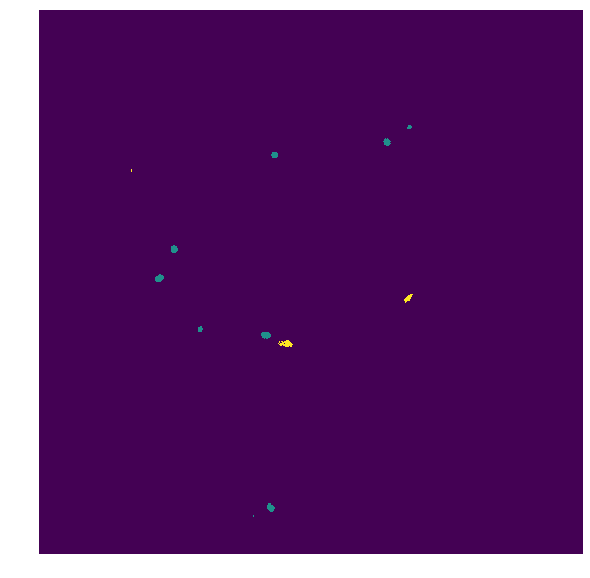

In [0]:

# img = open_image('data/images/220968 - 2.jpg')

# img = padImage_t(img)
# tiles = cut_tiles_t(img)

# n = len(tiles)
# pred_class, pred_idx, outputs = [None]*n, [None]*n, [None]*n
# for i, im in enumerate(tiles):
#   pc,pi,o = learn.predict(im)  
#   pred_class[i] = pc.px

# vstack = lay_tiles_t(pred_class, TM=4, TN=4, pad=100)
# Image(vstack).show(figsize = (10,10))

learn.model.float()
img = open_image('data/images/220970 - 1.jpg')


img = padImage_t(img)
tiles = cut_tiles_t(img, TM=4, TN=4, pad=100)

n = len(tiles)
pred_class, pred_idx, outputs = [None]*n, [None]*n, [None]*n
for i, im in enumerate(tiles):
  pc,pi,o = learn.predict(im)  
  pred_class[i] = pc.px

vstack = lay_tiles_t(pred_class, TM=4, TN=4, pad=100)
Image(vstack).show(figsize = (10,10))

In [0]:
open_image('data/images/220968 - 2.jpg')

## Infer Probabilities

### Generate prediction png file

In [0]:
def unet_predict_eggs(fn):
  img = open_image(fn)

  PAD = 100
  TM, TN =4, 4
  img = padImage_t(img, pad=PAD)
  tiles = cut_tiles_t(img, TM=TM, TN=TN, pad=PAD)

  outputs = []
  for i, im in enumerate(tiles):
    pc,pi,o = learn.predict(im)  
    outputs.append(o)

  vstack = lay_tiles_t(outputs, TM=TM, TN=TN, pad=PAD)
  vstack[0,:,:] = vstack[1,:,:]
  vstack[1,:,:] = vstack[2,:,:]
  vstack[2,:,:] = 0
#   vstack[vstack<0.3] = 0
  img = to_np(vstack).transpose(1,2,0)
  return img

def predict_in_image(fn, CONF=0.3):
  pred_img = unet_predict_eggs(fn)
#   predictions = mark_predictions(pred_img, CONF=CONF)
# #   print(predictions)
#   jdata= annotate_json(f'{img_path}/{fn.stem}.json', predictions)

#   mrk_img = np.asarray(PIL.Image.open(fn))
#   mrk_img = draw_labels_cv(mrk_img, jdata, radius=50)
#   return pred_img, mrk_img, jdata
  return pred_img

# img_path = Path('data/images/')
# mrk_path = Path('data/markup/')  

img_path = Path('data/testimages/')
mrk_path = Path('data/testimages-markup/')  
mrk_path.mkdir(parents=True, exist_ok=True)


fnames = sorted(get_image_files(img_path))

# fnames = fnames[600:]
fnames = fnames[:5]
print(f"Number images to process {len(fnames)}")


for fn in fnames:
  print(fn)
#   pred_img, mrk_img, jdata = predict_in_image(fn) 
  pred_img= predict_in_image(fn) 
  
#   with open(f'{mrk_path}/{fn.stem}.json', 'w') as outfile:
#     json.dump(jdata, outfile, ensure_ascii=False, indent=4)   

  PIL.Image.fromarray((pred_img*255).astype(np.uint8)).save(f'{mrk_path}/{fn.stem}.png')  
#   PIL.Image.fromarray(mrk_img.astype(np.uint8)).save(f'{mrk_path}/{fn.stem}.jpg', quality=90)  
 
#   if len(fnames) < 2:
#     show_img(mrk_img, figsize = (10,10))


Number images to process 5
data/testimages/221628 - 2.jpg
data/testimages/221629 - 1.jpg
data/testimages/221629 - 2.jpg
data/testimages/221630 - 1.jpg
data/testimages/221630 - 2.jpg


In [0]:
! ls data

__MACOSX  subset  subset-markup  subset_markup.zip


In [0]:
%%bash
zip -r 'FEC_data.zip' data
mv FEC_data.zip '/content/gdrive/My Drive/Colab Notebooks/Techion/data/SecondDataSet'

In [0]:
# ! mv data/'test_images_markup.zip' '/content/gdrive/My Drive/Colab Notebooks/Techion/data/SecondDataSet'

In [0]:
! mv FEC_data.zip '/content/gdrive/My Drive/Colab Notebooks/Techion/data/SecondDataSet'

crop  images  labels


### Class Analyse Predictions

In [0]:
## Class Analyse Predictions
# import pdb; pdb.set_trace()
import cv2
from skimage.measure import label, regionprops
from skimage import filters
from skimage.morphology import erosion, dilation, opening, closing, disk
from scipy.spatial import distance
import pandas as pd
from pandas import DataFrame

class AnalysePredictions(object):
    """Methods for preparing and the inference of Well images"""
    def __init__(self):
        """What to do here"""
        self.set_paths();

    def set_paths(self, base_path=None, img_path=None, mrk_path=None):
        if base_path is None:
            base_path = Path().absolute()
        if img_path is not None:
            self.img_path = base_path/Path(img_path) 
            self.mrk_path = base_path/Path(mrk_path)
        else:
            self.img_path = Path('data/images/')
            self.mrk_path = Path('data/markup/')
        
    # NP coder for Tile  into  MxN sections to reduce memory footprint
    def padImage_np(self, img, padding=100):
      if padding and padding > 0:
        return np.stack([np.pad(img[:,:,c], padding, mode='constant', constant_values=0) for c in range(3)], axis=2)
      else:
        return img

    def cut_tiles_np(img, TM=4, TN=4, pad=100):
      M, N = (img.shape[0]-pad*2)//TM, (img.shape[1]-pad*2)//TN 
      OM, ON = pad + M//2, pad + N//2
      return [img[x-OM:x+OM,y-ON:y+ON,:] for x in range(pad+M//2,img.shape[0],M) for y in range(pad+N//2,img.shape[1],N)]

    def lay_tiles_np(self, tiles, TM=4, TN=4, pad=100):
      OM, ON = pad + TM//2, pad + TN//2
      for n, tile in enumerate(tiles):
        tiles[n] = tile[pad:-pad,pad:-pad,:]

      hstack = [np.concatenate(tiles[y:y+TN],axis=1) for y in range(0,TN*TM,TN)]  
      return np.concatenate(hstack,axis=0)

    def test_tile_np(self):
        img = to_np(open_image('data/subset/220972 - 1.jpg').resize(800).px).transpose(1,2,0)
        img = padImage_np(img)
        tiles = cut_tiles_np(img)
        vstack = self.lay_tiles_np(tiles, TM=4, TN=4, pad=100)
        show_img(vstack, figsize = (10,10))

    ## Tensor coder for Tile  into  MxN sections to reduce memory footprint

    def padImage_t(self, img, pad=100):
      if pad and pad > 0:
        return F.pad(input=img.px, pad=(pad, pad, pad, pad), mode='constant', value=0)
      else:
        return img

    def cut_tiles_t(self, img, TM=4, TN=4, pad=100):
      M, N = (img.shape[1]-pad*2)//TM, (img.shape[2]-pad*2)//TN 
      OM, ON = pad + M//2, pad + N//2  
      return [Image(img[:,x-OM:x+OM,y-ON:y+ON]) for x in range(pad+M//2,img.shape[1],M) for y in range(pad+N//2,img.shape[2],N)]

    def lay_tiles_t(self, tiles, TM=4, TN=4, pad=100):
      (_,M,N) = tiles[0].size()
      OM, ON = pad + M//2, pad + N//2  
      for n, tile in enumerate(tiles):
        tiles[n] = tile[:,pad:-(pad+1),pad:-(pad+1)]

      hstack = [torch.cat(tiles[y:y+TN],dim=2) for y in range(0,TN*TM,TN)]  
      return torch.cat(hstack,dim=1)

    def test_tile_t(self):
        img = open_image('data/subset/220972 - 1.jpg')
        # img = to_np(open_image('data/subset/220972 - 1.jpg').resize(800).px).transpose(1,2,0)
        img = padImage_t(img)
        tiles = cut_tiles_t(img)

        for n, tile in enumerate(tiles):
            tiles[n] = tile.px
            print(tile.px.shape)

        vstack = lay_tiles_t(tiles)
        Image(vstack).show(figsize = (10,10))

    ## Drawing annotation labels on an image
    def draw_labels_cv(self, img, json, radius=40):
      font = cv2.FONT_HERSHEY_SIMPLEX
      for s, sh in enumerate(json['shapes']):
        if sh["label"][:3] == "Str":
          fill = (255,0,0)
        elif sh["label"][:3] == "Nem":
          fill = (0,255,0)
        else:
          print('[Error]: unknown label')

        draw = 'None'  
        if sh['shape_type'] == 'circle':
          draw = 'circle'
          probability = str(sh['probability']) if 'probability' in sh else ''
        elif sh['shape_type'] == 'rectangle':
          draw = 'rectangle'
        else:
          print("Unknown shape_type", sh['shape_type'])


        xy = np.asarray(sh["points"])
        ave = np.mean(xy,axis=0)

        cx = int(ave[0])
        cy = int(ave[1])

        if draw == 'circle':
          cv2.circle(img, (cx, cy), radius, fill, 2)
          cv2.circle(img, (cx, cy), radius, fill, 2)
          cv2.putText(img,probability,(int(cx-radius), cy-radius), font, 1, fill, 2, cv2.LINE_AA)


        elif draw == 'rectangle':
          cv2.rectangle(img, (cx - radius, cy - radius), (cx + radius, cy + radius), fill, 2)

      return img
    def test_draw_labels_cv(self):
        img_path = Path('data/subset/')
        tst_path = Path('data/test/')  
        tst_path.mkdir(parents=True, exist_ok=True)
        fn = Path('data/markup/220966 - 1.png')
        img = np.asarray(PIL.Image.open(fn))
        _json = json.load(open('data/markup/220966 - 1.json'))
        mrk_img = self.draw_labels_cv(img, _json, radius=40) 
        show_img(mrk_img[:500,1000:1500,:], figsize = (10,10))
        PIL.Image.fromarray(mrk_img.astype(np.uint8)).save(f'{tst_path}/{fn.stem}.jpg', quality=90) 

    ## 
    def find_prediction_blobs(self, img, CONF=0.5, radius=40, plot=False): 
        # region props seems to have region.max_intensity errors if no data not np.int 
        SCALE = 100
        CONF *= SCALE
        selem = disk(6)
    #     img = filters.gaussian(img, sigma= 1 / 40, multichannel=True)
        img = (img * (SCALE/img.max())).astype(np.int)
        img[img[:,:,0]<CONF,0] = 0
        img[img[:,:,1]<CONF,1] = 0
    #     img[:,:,0] = img[:,:,0] > CONF
    #     img[:,:,1] = img[:,:,1] > CONF
        predictions = []
    #     imgL = img[:,:,0].astype(np.int)
    #     img[:,:,0] = closing(img[:,:,0], selem)
    #     img[:,:,1] = closing(img[:,:,1], selem)
    #     img[:,:,0] = opening(img[:,:,0], selem)
    #     img[:,:,1] = opening(img[:,:,1], selem)

        fill = (255,0,0)
        label_image0 = label(img[:,:,0] > CONF)
        label_image1 = label(img[:,:,1] > CONF)

#         img = img.copy()  # helped with a cv error?
        img = np.array(img) # helped with a cv error?
        for region in regionprops(label_image0, img[:,:,0], cache=True):
            if region.area > 500:
                cx = int(region.centroid[1])
                cy = int(region.centroid[0])
#                 import pdb; pdb.set_trace()
#                 cv2.rectangle(img, (cx - radius, cy - radius), (cx + radius, cy + radius), fill, 5)
                predictions.append({"label": 'Strongyle', "point": [cx,cy], "probability": region.max_intensity.round(2)})  
    #             print(' 0:', [cx,cy], 'area:',  region.area, 
    #                   'max',  region.max_intensity.round(2), 
    #                   'mean', region.mean_intensity.round(2))
        fill = (0,255,0)
        img = np.array(img) # helped with a cv error?
        for region in regionprops(label_image1, img[:,:,1]):
            if region.area > 500:
                cx = int(region.centroid[1])
                cy = int(region.centroid[0])
#                 cv2.rectangle(img, (cx - radius, cy - radius), (cx + radius, cy + radius), fill, 5)
                predictions.append({"label": 'Nematodirus',"point": [cx,cy], "probability": region.max_intensity.round(2)})
    #             print(f' 1: area {region.area}, max intensity {region.max_intensity.round(5)}')
    #         #     print(region.area)
        if plot:
            #   show_img(imglab, figsize = (15,15))
            plt.figure(figsize=(15, 15))
            plt.subplot(121)
            plt.imshow(label_image0, cmap='nipy_spectral')
            #   plt.imshow(img[:,:,0] > CONF, cmap='nipy_spectral')
            plt.axis('off')
            plt.subplot(122)
            plt.imshow(label_image1, cmap='nipy_spectral')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        return predictions, img
    def test_find_prediction_blobs(self ): 
    #     fn = 'data/markup/220966 - 1.png'
        tst_path = Path('data/test/')
        fn = Path('data/markup/221221 - 1.png')
        print(f"Testing: def test_find_prediction_blobs('{fn}'):")
        img = np.asarray(PIL.Image.open(fn))


        anno_list, proc_img = self.find_prediction_blobs(img, plot=True)
        print("Max value", proc_img.max())
        PIL.Image.fromarray(proc_img.astype(np.uint8)).save(f'{tst_path}/{fn.stem}.png') 
    #     print(anno_list)

    ## Annotate the json file with predictions
    def annotate_json(self, fn, annotations=None):
        def add_anno(data, item):
            r = 40
            cx,cy = item['point']
            pnt_list = [[cx-r,cy-r], [cx+r,cy+r]]

            probability = str(item['probability']) if 'probability' in item else str(0)

            if item['label'][:3]=='Str': 
                line_color = [255,0,0,127]
                data['shapes'].append({
                        "label": item['label'],"line_color": line_color, "fill_color": None,
                        "points": pnt_list, "shape_type": "circle", 'probability': probability
            })      

            elif item['label'][:3]=='Nem': 
                line_color = [0,255,0,127]
                data['shapes'].append({
                        "label": item['label'],"line_color": line_color, "fill_color": None,
                        "points": pnt_list, "shape_type": "circle", 'probability': probability
                })
            else:
                print('Unknown label')

        def add_annotations(data, annotations): 
            for item in annotations:
                add_anno(data, item)

        def del_circle_annotations(data):
            to_del = [s for s,sh in enumerate(data['shapes']) if sh['shape_type']=='circle']
            if len(to_del) > 0: 
                print(f'Deleting {len(to_del)} circle annotations')
            for i in sorted(to_del, reverse=True):
                del data['shapes'][i]        

        data = json.load(open(fn))
        del_circle_annotations(data)
        add_annotations(data, annotations) 
        return data

    def test_annotate_json(self):  
      fn = 'data/markup/220966 - 1.png'
      img = np.asarray(PIL.Image.open(fn))

      predictions, _ = self.find_prediction_blobs(img, plot=False)
      print(predictions)
      data= self.annotate_json('data/subset/220966 - 1.json', predictions)
      print(data)
      with open('data/subset/220966 - 1.json', 'w') as outfile:
        json.dump(data, outfile, ensure_ascii=False, indent=4)   

    ## Unet Predict classes from a well image
    def unet_predict_classes(self):
        fn = 'data/subset/220967 - 1.json'
        data = json.load(open(fn))

        ## Infer Classes

        img = open_image('data/subset/220972 - 1.jpg')

        img = padImage_t(img)
        tiles = cut_tiles_t(img)

        n = len(tiles)
        pred_class, pred_idx, outputs = [None]*n, [None]*n, [None]*n
        for i, im in enumerate(tiles):
          pc,pi,o = learn.predict(im)  
          pred_class[i] = pc.px

        vstack = lay_tiles_t(pred_class, TM=4, TN=4, pad=100)
        Image(vstack).show(figsize = (10,10))

    ## Infer Probabilities
    def unet_predict_eggs(self, fn):
      img = open_image(fn)

      PAD = 100
      TM, TN =4, 4
      img = padImage_t(img, pad=PAD)
      tiles = cut_tiles_t(img, TM=TM, TN=TN, pad=PAD)

      outputs = []
      for i, im in enumerate(tiles):
        pc,pi,o = learn.predict(im)  
        outputs.append(o)

      vstack = lay_tiles_t(outputs, TM=TM, TN=TN, pad=PAD)
      vstack[0,:,:] = vstack[1,:,:]
      vstack[1,:,:] = vstack[2,:,:]
      vstack[2,:,:] = 0
    #   vstack[vstack<0.3] = 0
      img = to_np(vstack).transpose(1,2,0)
      return img


    ### Generate prediction png file
    # def predict_in_image(self, fn, CONF=0.3):
    #   pred_img = unet_predict_eggs(fn)
    #   predictions = mark_predictions(pred_img, CONF=CONF)
    # #   print(predictions)
    #   jdata= annotate_json(f'{img_path}/{fn.stem}.json', predictions)
    # 
    #   mrk_img = np.asarray(PIL.Image.open(fn))
    #   mrk_img = draw_labels_cv(mrk_img, jdata, radius=50)
    #   return pred_img, mrk_img, jdata

    def markup_image(self, img, CONF=0.5):
        predictions, _ = self.find_prediction_blobs(img, CONF=CONF)
        #   print(predictions)
        jdata= self.annotate_json(f'{self.img_path}/{fn.stem}.json', predictions)

        mrk_img = np.asarray(PIL.Image.open(f'{img_path}/{fn.stem}.jpg'))
        mrk_img = self.draw_labels_cv(mrk_img, jdata, radius=50)
        return mrk_img, jdata
    
    def markup_all_images_dir(self, count='all', CONF=0.5):
        fnames = sorted(get_files(self.mrk_path, '.png'))
        if count.isdigit(): 
            fnames = fnames[:count]
        print(f'Marking up {len(fnames)} images')

        for n, fn in enumerate(fnames):
#             print(fn, end=' ')
            src_img = np.asarray(PIL.Image.open(fn))
            # find blobs in png            mrk_img, jdata = self.markup_image(img) 
            predictions, _ = self.find_prediction_blobs(src_img, CONF=CONF)
            print(len(predictions), end=', ')
            if n % 20 == 0:
              print(';')
    
            # annotate json
            jdata= self.annotate_json(f'{self.img_path}/{fn.stem}.json', predictions)
            with open(f'{self.mrk_path}/{fn.stem}.json', 'w') as outfile:
                json.dump(jdata, outfile, ensure_ascii=False, indent=4)   
            # mark up jpg
            mrk_img = np.asarray(PIL.Image.open(f'{self.img_path}/{fn.stem}.jpg'))
            mrk_img = self.draw_labels_cv(mrk_img, jdata, radius=50)
            PIL.Image.fromarray(mrk_img.astype(np.uint8)).save(f'{self.mrk_path}/{fn.stem}.jpg', quality=90)  

        return mrk_img
    


    def calc_stats_row(self, jdata, radius=30):
        human = []
        machine = []
        for s,sh in enumerate(jdata['shapes']):
            ave = np.mean(np.asarray(sh["points"]),axis=0).tolist()
            if sh['shape_type'] == 'rectangle':
                human.append(ave)
            elif sh['shape_type'] == 'circle':
                machine.append(ave)
            else:
                print("unknown label", data["imagePath"])

        if (len(human) > 0) and (len(machine) > 0):
            dist = distance.cdist(human, machine, 'euclidean')
            n_human, n_AI, n_match = len(human), len(machine), (np.min(dist, axis=1) < radius).sum()
        else:
            n_human, n_AI, n_match = len(human), len(machine), 0

        row = {
            'File': jdata["imagePath"],
            'Num Human': n_human, 
            'Num AI': n_AI, 
            'Matched': n_match, 
            'AI: Un-matched': n_AI - n_match, 
            'AI: Missed Eggs': n_human - n_match
        }

        return row

    def calc_stats_table(self):
        # img_path = Path('data/markup')
    #     mrk_path = Path('data/testimages-markup/')

        fnames = sorted(get_files(self.mrk_path, '.json'))

        df = DataFrame (columns = ['File', 'Num Human','Num AI', 'Matched', 'AI: Un-matched', 'AI: Missed Eggs'])
        fnames = fnames
        for fn in fnames:
            data = json.load(open(fn))
            row = self.calc_stats_row(data, radius=30)
            df = df.append(row, ignore_index=True)

        for col in range(1, len(df.columns)):
            df.iloc[:,col] = pd.to_numeric(df.iloc[:,col])

        _sum = df.sum(axis = 0, skipna=True, numeric_only=True).rename('Total') 
        _mean = df.mean(axis = 0, skipna=True, numeric_only=True).rename('Mean') 

        # df= df.append(df.sum(axis = 0, skipna=True, numeric_only=True).rename('Total')) 

        # df=df.append(df.mean(axis = 0, skipna=True, numeric_only=True).rename('Mean'))    
        df = df.append(_mean).append(_sum)
        return df
    def plot_piechart(self, df):
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
        explode = (0.1, 0)  # explode 1st slice
        labels = 'Matched Eggs', 'AI: Missed Eggs' 
        sizes = [df.at['Total','Matched'], df.at['Total','AI: Missed Eggs']]
        axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

        labels = 'Matched Eggs', 'AI: Predictions not Matched' 
        sizes = [df.at['Total','Matched'], df.at['Total','AI: Un-matched']]
        axes[1].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
        plt.tight_layout(pad=0.0)
# pi = AnalysePredictions()
# print("Start tests:")
# pi.test_annotate_json()
# ii.test_draw_labels_cv()
# ii.test_find_prediction_blobs()

### Run Analysis

Marking up 5 images
21, ;
8, 8, 8, 10, 

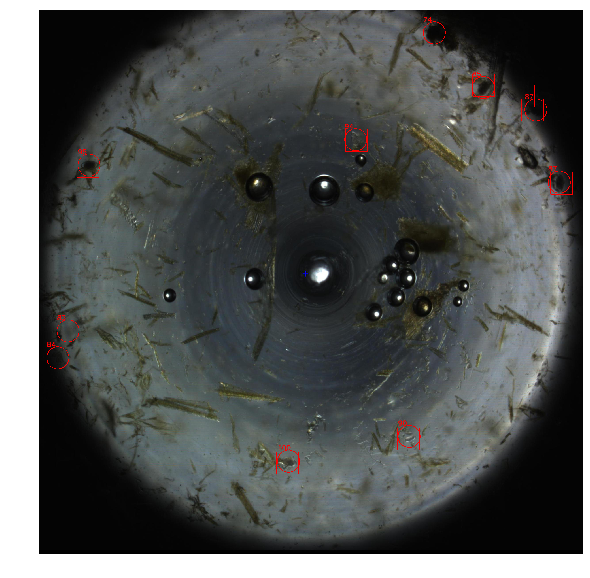

In [0]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax


ip = AnalysePredictions()
ip.set_paths(base_path='', 
             img_path='data/testimages/', 
             mrk_path = 'data/testimages-markup/') 
mrk_img = ip.markup_all_images_dir(count = 'all')
show_img(mrk_img, figsize = (10,10))

In [0]:
mrk_img

In [0]:
df = ip.calc_stats_table()
df.tail(10)

,File,Num Human,Num AI,Matched,AI: Un-matched,AI: Missed Eggs
0,221628 - 2.jpg,23.0,21.0,21.0,0.0,2.0
1,221629 - 1.jpg,8.0,8.0,8.0,0.0,0.0
2,221629 - 2.jpg,9.0,8.0,9.0,-1.0,0.0
3,221630 - 1.jpg,7.0,8.0,7.0,1.0,0.0
4,221630 - 2.jpg,8.0,10.0,7.0,3.0,1.0
Mean,NaN,11.0,11.0,10.4,0.6,0.6
Total,NaN,55.0,55.0,52.0,3.0,3.0


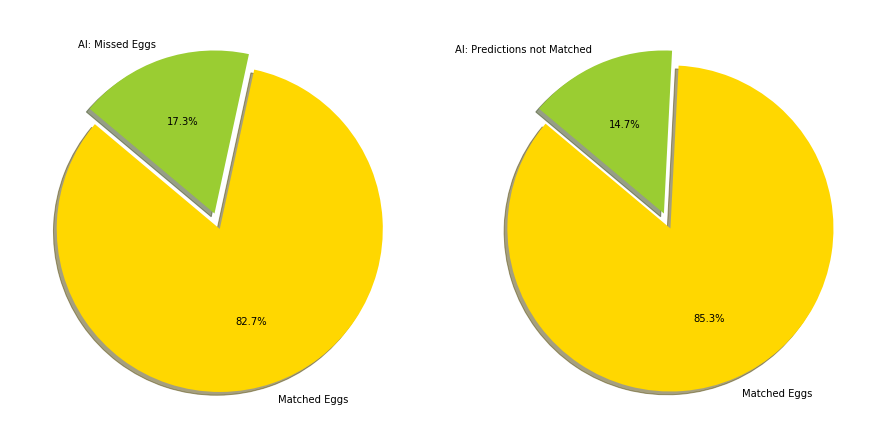

In [0]:
ip.plot_piechart(df)